## Parte 1

## Seteamos variables

In [1]:
import michigrad.nn as nn
from michigrad.visualize import show_graph

tabla_verdad_xor = [
    [0.,0.,   0.],
    [0.,1.,   1.],
    [1.,0.,   1.],
    [1.,1.,   0.]
]

inputs = [elem[:-1] for elem in tabla_verdad_xor]
real_results = [elem[-1] for elem in tabla_verdad_xor]

model = nn.MLP(2, [2, 1])

# Hacemos lineal a las neuronas, de tal manera que no use ReLU
for layer in model.layers:
    for neuron in layer.neurons:
        neuron.nonlin = False
    


## Primer etapa forward

In [2]:
# Usamos la técnica batch, que utiliza todos los ejemplos
# del dataset

predicciones = list()

for entrada in inputs:
    predicciones.append(model(entrada))
    print(f"Red con el forward pass de {entrada}")
    

for i in range(len(predicciones)):
    print(f"Prediccion para {inputs[i]} es {predicciones[i]}") 
# El resultado que vemos es la primera etapa forward con la entrada (0,0)


Red con el forward pass de [0.0, 0.0]
Red con el forward pass de [0.0, 1.0]
Red con el forward pass de [1.0, 0.0]
Red con el forward pass de [1.0, 1.0]
Prediccion para [0.0, 0.0] es Value(data=0.0, grad=0, name=)
Prediccion para [0.0, 1.0] es Value(data=0.2691052563456544, grad=0, name=)
Prediccion para [1.0, 0.0] es Value(data=-0.3637953580310975, grad=0, name=)
Prediccion para [1.0, 1.0] es Value(data=-0.09469010168544317, grad=0, name=)


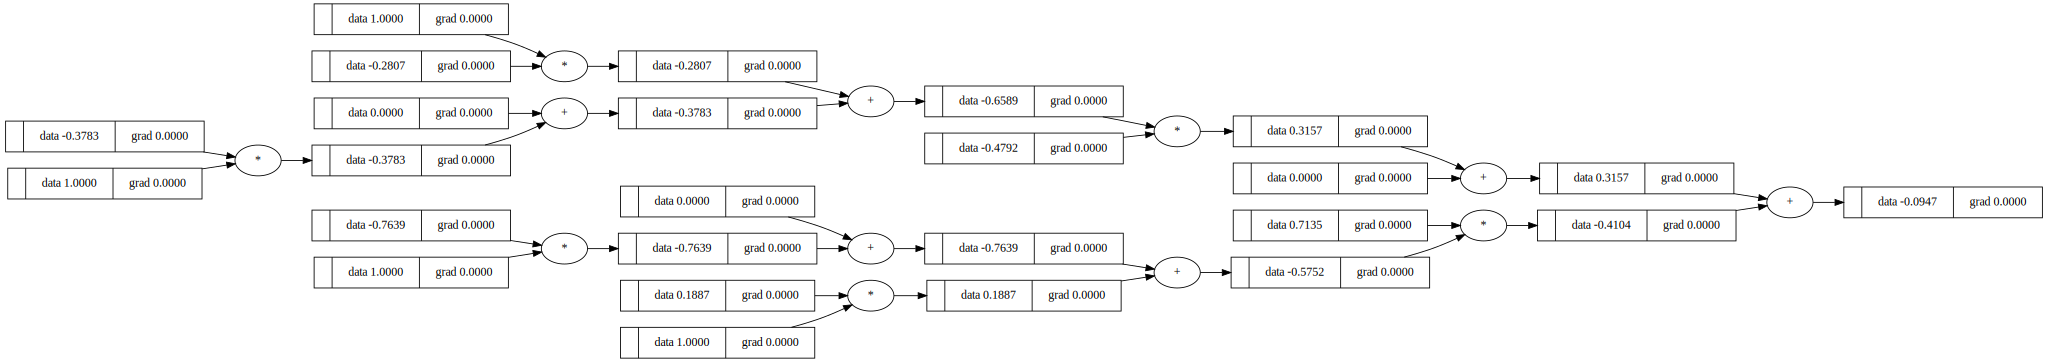

In [3]:
# Pero si en singular
show_graph(model(inputs[3]))

## Primer backpropagation

In [4]:
def grad_cero(parameters):
    assert isinstance(parameters, list)
    
    for p in parameters:
        p.grad = 0.0

# Para que quede limpio 
grad_cero(model.parameters())




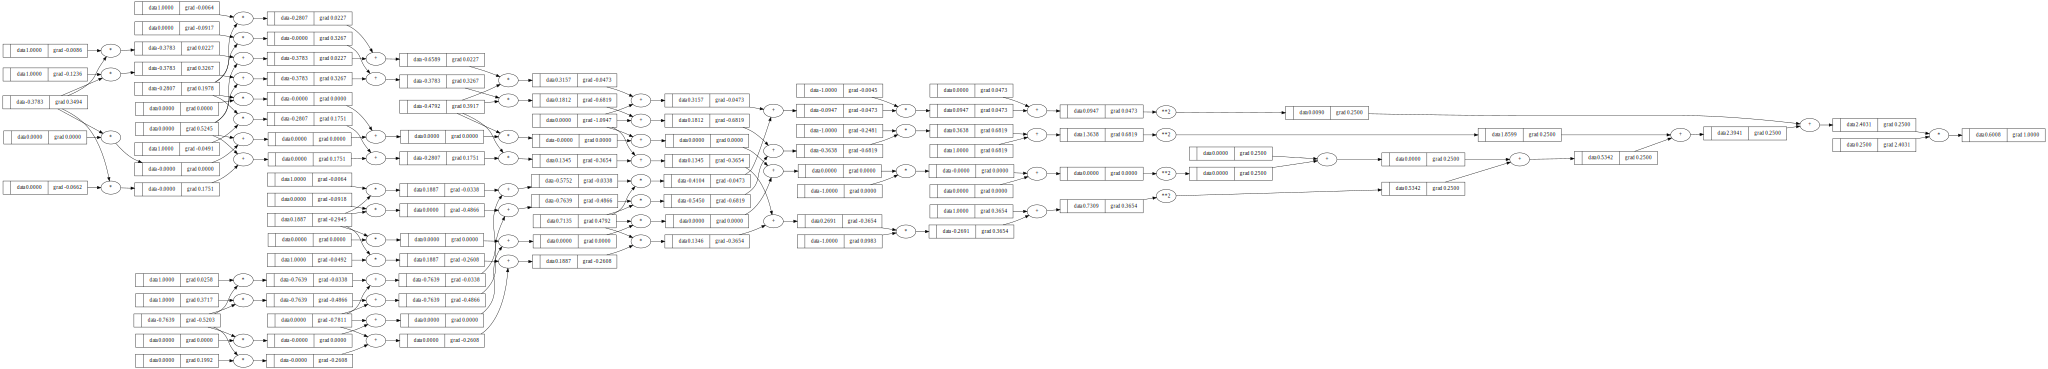

In [5]:
# Calculamos la función de perdida
loss = sum([(real-prediccion)**2 for real,prediccion in zip(real_results, predicciones)]) / len(inputs)

# Realizamos el backward
loss.backward()

# Mostramos como quedo el grafo de dependencias
show_graph(loss)


    


In [6]:
# Defino el hiperparametro alpha
ALPHA = 0.1

# Cantidad de epocas
EPOCAS = 100
loss_lista = list()
for _ in range(EPOCAS):
    
    predicciones.clear()
    # FORWARD
    for entrada in inputs:
        x = model(entrada)
        
        predicciones.append(x)
        #print(f"Red con el forward pass de {entrada}")
        
    # Calculamos perdida
    loss = sum([(real-prediccion)**2 for real,prediccion in zip(real_results, predicciones)]) / len(inputs)
    print(predicciones)
    loss_lista.append(loss.data)
    
    # zero grad
    parameters = model.parameters()
    grad_cero(parameters)
    
    # Backward
    loss.backward()
    
    # Actualizo los pesos
    for p in parameters:
        p.data -= p.grad * ALPHA
    


[Value(data=0.0, grad=0, name=), Value(data=0.2691052563456544, grad=0, name=), Value(data=-0.3637953580310975, grad=0, name=), Value(data=-0.09469010168544317, grad=0, name=)]
[Value(data=0.18864925873239802, grad=0, name=), Value(data=0.489564571144551, grad=0, name=), Value(data=-0.07098216697878434, grad=0, name=), Value(data=0.2299331454333685, grad=0, name=)]
[Value(data=0.2875979491542271, grad=0, name=), Value(data=0.6009966843535539, grad=0, name=), Value(data=0.08388654565840148, grad=0, name=), Value(data=0.3972852808577283, grad=0, name=)]
[Value(data=0.34090267874793184, grad=0, name=), Value(data=0.6554498659806804, grad=0, name=), Value(data=0.17118891579193074, grad=0, name=), Value(data=0.4857361030246794, grad=0, name=)]
[Value(data=0.36969365838688933, grad=0, name=), Value(data=0.6790808580199243, grad=0, name=), Value(data=0.22242695460288275, grad=0, name=), Value(data=0.5318141542359178, grad=0, name=)]
[Value(data=0.3854688039590464, grad=0, name=), Value(data=0

[Value(data=0.45742020206983675, grad=0, name=), Value(data=0.5392285130725037, grad=0, name=), Value(data=0.4542843460054016, grad=0, name=), Value(data=0.5360926570080685, grad=0, name=)]
[Value(data=0.45837504032019905, grad=0, name=), Value(data=0.5380004868759901, grad=0, name=), Value(data=0.4556534945781505, grad=0, name=), Value(data=0.5352789411339415, grad=0, name=)]
[Value(data=0.45931230054066435, grad=0, name=), Value(data=0.5368168218982275, grad=0, name=), Value(data=0.4569757799351346, grad=0, name=), Value(data=0.5344803012926976, grad=0, name=)]
[Value(data=0.4602321115463679, grad=0, name=), Value(data=0.5356755759023872, grad=0, name=), Value(data=0.45825316967630636, grad=0, name=), Value(data=0.5336966340323258, grad=0, name=)]
[Value(data=0.46113461260679617, grad=0, name=), Value(data=0.5345749112526202, grad=0, name=), Value(data=0.4594875265216827, grad=0, name=), Value(data=0.5329278251675067, grad=0, name=)]
[Value(data=0.46201995266442386, grad=0, name=), V

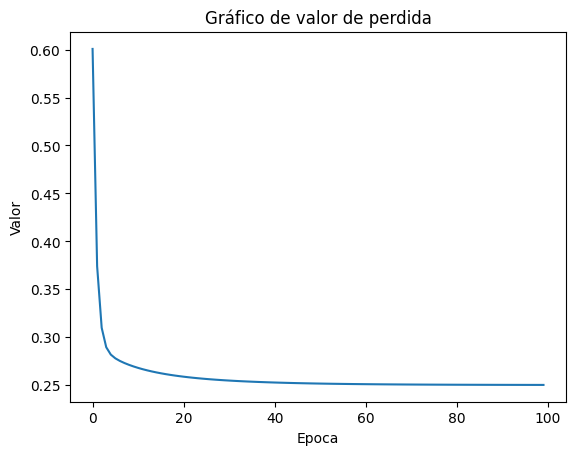

In [7]:
import matplotlib.pyplot as plt

# Crear gráfico de líneas
plt.plot(loss_lista)

# Personalizar el gráfico (opcional)
plt.title('Gráfico de valor de perdida')
plt.xlabel('Epoca')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()

In [8]:
model(inputs)

TypeError: can't multiply sequence by non-int of type 'float'